<a href="https://colab.research.google.com/github/StevTobs/TimeSeries_Python/blob/master/Time_Series_with_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#--------Colab-----------
!pip install -U -q PyDrive
  
from pydrive.auth import GoogleAuth 
from pydrive.drive import GoogleDrive 
from google.colab import auth 
from oauth2client.client import GoogleCredentials 
from google.colab import files
#Authenticate and create the PyDrive client. 
auth.authenticate_user() 
gauth = GoogleAuth() 
gauth.credentials = GoogleCredentials.get_application_default() 
drive = GoogleDrive(gauth) 

#--------Colab-----------
# To import from google drive of 'starbick.csv' 
# https://drive.google.com/file/d/11Em1TurJJcYlLgHoEB4MYo1H8ejQHP3o/view?usp=sharing

# your_module = drive.CreateFile({'id':'11Em1TurJJcYlLgHoEB4MYo1H8ejQHP3o'}) 
# your_module.GetContentFile('starbucks.csv')



#------------------------ 


## Time series with Pandas
### Table of Contents
   * [DataTime Index Basic](#DataTimeIndexBasic)
   * [Time Resapling](#TimeResapling)
    - Time Shifting
    - Rolling and Expanding
    - Time Series Visualization
    - Time Series Project Exercise
    
    


## DataTime Index Basic <a class="anchor" id="DataTimeIndexBasic"></a>

In [ ]:
# None Pandas

In [ ]:
from datetime import datetime

In [ ]:
my_year = 2020
my_month = 1
my_day = 2
my_hour = 13
my_min = 30
my_sec = 15

Create **datetime object**

In [ ]:
#shift tab
my_date = datetime(my_year, my_month, my_day)

In [ ]:
my_date

datetime.datetime(2020, 1, 2, 0, 0)

In [ ]:
my_date_time = datetime(my_year, my_month, my_day, my_hour, my_min, my_sec)

In [ ]:
#tab
my_date_time

datetime.datetime(2020, 1, 2, 13, 30, 15)

In [ ]:
my_date_time.day

2

In [ ]:
my_date_time.hour

13

In [ ]:
type(my_date_time)

datetime.datetime

In [ ]:
import numpy as np

In [ ]:
# Just string
np.array(['200-03-15','2020-03-16','2020-03-17'])

array(['200-03-15', '2020-03-16', '2020-03-17'], dtype='<U10')

In [ ]:
# Datetime object specification
np.array(['2020-03-15','2020-03-16','2020-03-17'],dtype='datetime64') #means 64bit
#D is day

array(['2020-03-15', '2020-03-16', '2020-03-17'], dtype='datetime64[D]')

In [ ]:
np.array(['200-03-15','2020-03-16','2020-03-17'],dtype='datetime64[Y]') #Y is day

array(['0200', '2020', '2020'], dtype='datetime64[Y]')

In [ ]:
np.array(['200-03-15','2020-03-16','2020-03-17'],dtype='datetime64[h]') #h is hour

array(['0200-03-15T00', '2020-03-16T00', '2020-03-17T00'],
      dtype='datetime64[h]')

In [ ]:
np.arange(0,10,2)

array([0, 2, 4, 6, 8])

In [ ]:
#apply day step 
np.arange('2018-06-01','2018-06-23',7, dtype='datetime64[D]')

array(['2018-06-01', '2018-06-08', '2018-06-15', '2018-06-22'],
      dtype='datetime64[D]')

In [ ]:
#Every data (becareful every hours)
np.arange('1968','1976',dtype='datetime64[Y]')

array(['1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975'],
      dtype='datetime64[Y]')

In [ ]:
# DateTime in Pandas

In [ ]:
import pandas as pd

In [ ]:
pd.date_range('2020-01-01',periods=7,freq='D') # ความละเอียดระดับ nano second.

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07'],
              dtype='datetime64[ns]', freq='D')

In [ ]:
pd.date_range('Jan 01, 2018',periods=7,freq='D')

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07'],
              dtype='datetime64[ns]', freq='D')

In [ ]:
pd.to_datetime(['1/2/2018','Jan 03, 2018'])

DatetimeIndex(['2018-01-02', '2018-01-03'], dtype='datetime64[ns]', freq=None)

In [ ]:
pd.to_datetime(['2/1/2018','3/1/2018'])#UK Style is not working

DatetimeIndex(['2018-02-01', '2018-03-01'], dtype='datetime64[ns]', freq=None)

In [ ]:
pd.to_datetime(['2/1/2018','3/1/2018'], format='%d/%m/%Y') #Europion

DatetimeIndex(['2018-01-02', '2018-01-03'], dtype='datetime64[ns]', freq=None)

In [ ]:
pd.to_datetime(['2--1--2018','3--1--2018'], format='%d--%m--%Y')

DatetimeIndex(['2018-01-02', '2018-01-03'], dtype='datetime64[ns]', freq=None)

In [ ]:
data = np.random.randn(3,2)
cols = ['A','B']
print(data)

[[ 0.10495133  1.59207935]
 [-0.49124923  0.55600237]
 [ 0.58519203  0.18345926]]


In [ ]:
idx = pd.date_range('2020-01-01', periods=3, freq='D')

df = pd.DataFrame(data, index=idx, columns=cols)

In [ ]:
df

,A,B
2020-01-01,0.104951,1.592079
2020-01-02,-0.491249,0.556002
2020-01-03,0.585192,0.183459


In [ ]:
df.index

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03'], dtype='datetime64[ns]', freq='D')

In [ ]:
df.index.max()

Timestamp('2020-01-03 00:00:00', freq='D')

In [ ]:
df.index.argmax()

2

In [ ]:
df.index.min()

Timestamp('2020-01-01 00:00:00', freq='D')

In [ ]:
df.index.argmin()

0


___

## Time Resapling <a class="anchor" id="TimeResapling"></a>

In [ ]:
#@title
import pandas as pd

In [ ]:
pwd

'/content'

In [ ]:
#--------Colab-----------
# To import from google drive of 'starbick.csv' 
# https://drive.google.com/file/d/11Em1TurJJcYlLgHoEB4MYo1H8ejQHP3o/view?usp=sharing

your_module = drive.CreateFile({'id':'11Em1TurJJcYlLgHoEB4MYo1H8ejQHP3o'}) 
your_module.GetContentFile('starbucks.csv')
PATH_googleDrive = 'starbucks.csv'

#------------------------ 

In [ ]:
PATH = PATH_googleDrive

df = pd.read_csv(PATH, index_col = 'Date')

In [ ]:
df.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


In [ ]:
df.info()#To see the amout of dta

<class 'pandas.core.frame.DataFrame'>
Index: 1006 entries, 2015-01-02 to 2018-12-31
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   1006 non-null   float64
 1   Volume  1006 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 23.6+ KB


In [ ]:
df.index

Index(['2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07', '2015-01-08',
       '2015-01-09', '2015-01-12', '2015-01-13', '2015-01-14', '2015-01-15',
       ...
       '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20', '2018-12-21',
       '2018-12-24', '2018-12-26', '2018-12-27', '2018-12-28', '2018-12-31'],
      dtype='object', name='Date', length=1006)

In [ ]:
df = pd.read_csv(PATH, index_col = 'Date', parse_dates=True)

In [ ]:
df.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


In [ ]:
df.index

DatetimeIndex(['2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07',
               '2015-01-08', '2015-01-09', '2015-01-12', '2015-01-13',
               '2015-01-14', '2015-01-15',
               ...
               '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20',
               '2018-12-21', '2018-12-24', '2018-12-26', '2018-12-27',
               '2018-12-28', '2018-12-31'],
              dtype='datetime64[ns]', name='Date', length=1006, freq=None)

__resample()__

A common operation with time series data is resampling based on the time series index. Let's see how to use the resample() method. [[reference](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.resample.html)]

When calling `.resample()` you first need to pass in a **rule** parameter, then you need to call some sort of aggregation function.

The **rule** parameter describes the frequency with which to apply the aggregation function (daily, monthly, yearly, etc.)<br>
It is passed in using an "offset alias" - refer to the table below. [[reference](http://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases)]

The aggregation function is needed because, due to resampling, we need some sort of mathematical rule to join the rows (mean, sum, count, etc.)

<table style="display: inline-block">
    <caption style="text-align: center"><strong>TIME SERIES OFFSET ALIASES</strong></caption>
<tr><th>ALIAS</th><th>DESCRIPTION</th></tr>
<tr><td>B</td><td>business day frequency</td></tr>
<tr><td>C</td><td>custom business day frequency (experimental)</td></tr>
<tr><td>D</td><td>calendar day frequency</td></tr>
<tr><td>W</td><td>weekly frequency</td></tr>
<tr><td>M</td><td>month end frequency</td></tr>
<tr><td>SM</td><td>semi-month end frequency (15th and end of month)</td></tr>
<tr><td>BM</td><td>business month end frequency</td></tr>
<tr><td>CBM</td><td>custom business month end frequency</td></tr>
<tr><td>MS</td><td>month start frequency</td></tr>
<tr><td>SMS</td><td>semi-month start frequency (1st and 15th)</td></tr>
<tr><td>BMS</td><td>business month start frequency</td></tr>
<tr><td>CBMS</td><td>custom business month start frequency</td></tr>
<tr><td>Q</td><td>quarter end frequency</td></tr>
<tr><td></td><td><font color=white>intentionally left blank</font></td></tr></table>

<table style="display: inline-block; margin-left: 40px">
<caption style="text-align: center"></caption>
<tr><th>ALIAS</th><th>DESCRIPTION</th></tr>
<tr><td>BQ</td><td>business quarter endfrequency</td></tr>
<tr><td>QS</td><td>quarter start frequency</td></tr>
<tr><td>BQS</td><td>business quarter start frequency</td></tr>
<tr><td>A</td><td>year end frequency</td></tr>
<tr><td>BA</td><td>business year end frequency</td></tr>
<tr><td>AS</td><td>year start frequency</td></tr>
<tr><td>BAS</td><td>business year start frequency</td></tr>
<tr><td>BH</td><td>business hour frequency</td></tr>
<tr><td>H</td><td>hourly frequency</td></tr>
<tr><td>T, min</td><td>minutely frequency</td></tr>
<tr><td>S</td><td>secondly frequency</td></tr>
<tr><td>L, ms</td><td>milliseconds</td></tr>
<tr><td>U, us</td><td>microseconds</td></tr>
<tr><td>N</td><td>nanoseconds</td></tr></table>

In [ ]:
# dailt ---> yearly
df.resample(rule='A').mean()
# .max()
# .min()
# .std()

,Close,Volume
Date,,
2015-12-31,50.078100,8.649190e+06
2016-12-31,53.891732,9.300633e+06
2017-12-31,55.457310,9.296078e+06
2018-12-31,56.870005,1.122883e+07


In [ ]:
def first_day(entry):
    
    # IS THERE AN ENTRY??
    if len(entry) :
        #IF SO, RETURN FIRST ENTRY
        return entry[0]
        

In [ ]:
#Apply for seing the first day
#Use apply method for applying your custom function
df.resample(rule='A').apply(first_day)

,Close,Volume
Date,,
2015-12-31,38.0061,6906098
2016-12-31,55.0780,13521544
2017-12-31,53.1100,7809307
2018-12-31,56.3243,7215978


In [ ]:
df.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


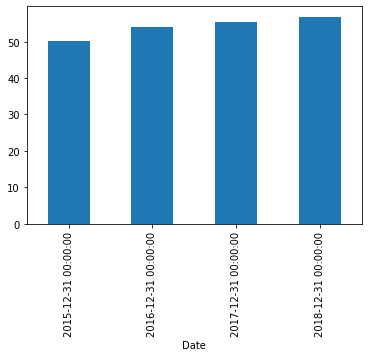

In [ ]:
%matplotlib inline
df['Close'].resample('A').mean().plot.bar()

In [ ]:
title = 